# Projet 4

In [1]:
import pandas as pd
import numpy as np

Import des 4 CSV contenant les données

In [2]:
aide_alimentaire = pd.read_csv('/Users/Anais/Downloads/DAN-P4-FAO (2)/aide_alimentaire.csv')
sous_nutrition = pd.read_csv('/Users/Anais/Downloads/DAN-P4-FAO (2)/sous_nutrition.csv')
population = pd.read_csv('/Users/Anais/Downloads/DAN-P4-FAO (2)/population.csv')
dispo_alimentaire = pd.read_csv('/Users/Anais/Downloads/DAN-P4-FAO (2)/dispo_alimentaire.csv')

Vérification des types de données contenues dans chaque DataFrame

In [3]:
print(aide_alimentaire.dtypes)

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object


In [4]:
print(sous_nutrition.dtypes)

Zone      object
Année     object
Valeur    object
dtype: object


In [5]:
print(population.dtypes)

Zone       object
Année       int64
Valeur    float64
dtype: object


In [6]:
print(dispo_alimentaire.dtypes)

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

Utilisation d'une fonction permettant de faire ressortir les valeurs manquantes. Dans DF aide_alimentaire, aucune valeur manquantes

In [7]:
aide_alimentaire.isnull().sum().sum()

0

Utilisation d'une fonction permettant de faire ressortir les valeurs manquantes. Dans DF aide_alimentaire, 594 valeurs manquantes que nous allons devoir remplacer

In [8]:
sous_nutrition.isnull().sum().sum()

594

Utilisation d'une fonction permettant de faire ressortir les valeurs manquantes. Dans DF population, aucune valeur manquante

In [9]:
population.isnull().sum().sum()

0

Utilisation d'une fonction permettant de faire ressortir les valeurs manquantes. Dans DF dispo_alimentaire, 93156 valeurs manquantes

In [10]:
dispo_alimentaire.isnull().sum().sum()

93156

# Gestion des valeurs extrêmes

Utilisation de la fonction .describe() qui calcule certaines données statistiques

In [11]:
dispo_alimentaire.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
mean,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
std,4240.119637,5076.785816,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,1113.100416,12067.344094,528.069224,10381.795904,549.834540
min,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000
max,150000.000000,347309.000000,1711.000000,430.760000,60.760000,54.970000,739267.000000,42797.000000,63381.000000,426850.000000,55047.000000,739267.000000,17060.000000,326711.000000,5284.000000


Répartition des données pour "Aliments pour animaux"

<AxesSubplot:>

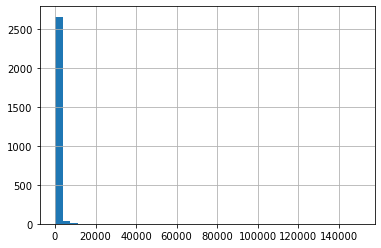

In [12]:
dispo_alimentaire['Aliments pour animaux'].hist(bins=40)

In [13]:
outlier_aliments_animaux_manuel = 20000

In [14]:
ma_outlier_aliments_animaux_manuel = dispo_alimentaire['Aliments pour animaux'] >= outlier_aliments_animaux_manuel

In [15]:
dispo_alimentaire[ma_outlier_aliments_animaux_manuel]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
2130,Brésil,Maïs,vegetale,40487.0,NaN,240.0,28.01,0.98,5.31,54737.0,26780.0,979.0,5612.0,8145.0,80538.0,386.0,108.0,0.0
3284,"Chine, continentale",Blé,vegetale,26628.0,2929.0,549.0,63.36,2.92,17.53,125247.0,563.0,5666.0,87783.0,2990.0,121926.0,4600.0,316.0,-1783.0
3321,"Chine, continentale","Légumes, Autres",vegetale,35582.0,NaN,203.0,308.07,1.76,11.47,500070.0,8084.0,304.0,426850.0,37638.0,507850.0,NaN,NaN,0.0
3323,"Chine, continentale",Manioc,vegetale,22868.0,7940.0,6.0,1.91,0.01,0.05,33590.0,41.0,29046.0,2645.0,138.0,4585.0,NaN,NaN,NaN
3324,"Chine, continentale",Maïs,vegetale,150000.0,35172.0,54.0,6.78,0.18,1.17,212998.0,251.0,3269.0,9391.0,10250.0,218489.0,1650.0,6535.0,-8509.0
3337,"Chine, continentale",Patates douces,vegetale,33270.0,NaN,66.0,24.27,0.20,0.66,70420.0,120.0,14.0,33623.0,3526.0,70526.0,NaN,NaN,0.0
3348,"Chine, continentale",Pommes de Terre,vegetale,22165.0,221.0,80.0,41.42,0.11,1.93,96068.0,377.0,503.0,57384.0,4797.0,95942.0,3100.0,8400.0,0.0
6235,Inde,Lait - Excl Beurre,animale,22757.0,0.0,129.0,84.50,5.65,8.17,133443.0,2175.0,18.0,105807.0,4878.0,135600.0,NaN,NaN,0.0
9830,Nigéria,Manioc,vegetale,26288.0,NaN,262.0,118.86,0.58,1.22,53004.0,11.0,15.0,20636.0,6080.0,53000.0,NaN,0.0,0.0
15391,États-Unis d'Amérique,Maïs,vegetale,128024.0,137023.0,92.0,12.24,0.26,1.67,292776.0,24655.0,3595.0,3917.0,NaN,353699.0,582.0,23230.0,-39863.0


Répartition des données pour "Autres Utilisations"

<AxesSubplot:>

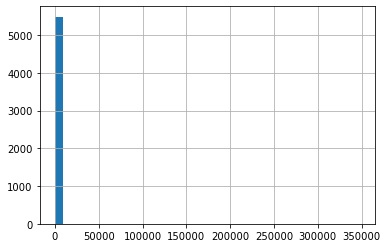

In [16]:
dispo_alimentaire['Autres Utilisations'].hist(bins=40)

On cherche à savoir quelles sont les lignes pour lesquelles le champs "Autres Utilisations" est > à 50000

In [17]:
outlier_autres_utilisations_manuel = 50000

In [18]:
ma_outlier_autres_utilisations_manuel = dispo_alimentaire['Autres Utilisations'] >= outlier_autres_utilisations_manuel

In [19]:
dispo_alimentaire[ma_outlier_autres_utilisations_manuel]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
2163,Brésil,"Sucre, canne",vegetale,6900.0,347309.0,13.0,16.47,0.09,0.05,739267.0,0.0,NaN,3300.0,55047.0,739267.0,NaN,326711.0,NaN
15391,États-Unis d'Amérique,Maïs,vegetale,128024.0,137023.0,92.0,12.24,0.26,1.67,292776.0,24655.0,3595.0,3917.0,NaN,353699.0,582.0,23230.0,-39863.0


L'histogramme montre une concontration des valeurs < 50000 donc suppresion des outliers supérieur à cette valeur

In [20]:
idx_outlier_autres_utilisations = dispo_alimentaire[ma_outlier_autres_utilisations_manuel].index

In [21]:
dispo_alimentaire.loc[idx_outlier_autres_utilisations, 'Autres Utilisations']=50000

Répartition des données pour "Disponibilité alimentaire (Kcal/personne/jour)"

<AxesSubplot:>

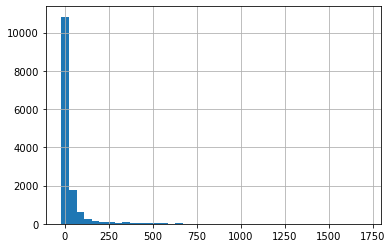

In [22]:
dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'].hist(bins=40)

On cherche à savoir quelles sont les lignes pour lesquelles le champ "Disponibilité alimentaire (Kcal/personne/jour)" est > à 1500

In [23]:
outlier_disponiblité_alimentaire_manuel = 1500

In [24]:
ma_outlier_disponilité_alimentaire_manuel = dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'] >= outlier_disponiblité_alimentaire_manuel

In [25]:
dispo_alimentaire[ma_outlier_disponilité_alimentaire_manuel]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
1085,Azerbaïdjan,Blé,vegetale,591.0,264.0,1666.0,222.40,6.68,49.47,3484.0,5.0,1589.0,2093.0,71.0,1893.0,142.0,323.0,6.0
1331,Bangladesh,Riz (Eq Blanchi),vegetale,1031.0,4.0,1711.0,171.73,3.78,32.14,30432.0,1.0,260.0,26892.0,1718.0,34350.0,788.0,0.0,-4177.0
2693,Cambodge,Riz (Eq Blanchi),vegetale,188.0,2345.0,1518.0,159.10,5.02,30.95,6088.0,376.0,47.0,2408.0,939.0,6263.0,207.0,NaN,154.0
14108,Tunisie,Blé,vegetale,136.0,NaN,1576.0,197.50,5.72,47.59,2582.0,150.0,1489.0,2172.0,213.0,975.0,62.0,0.0,268.0


Les valeurs des outliers ne paraissent pas abérantes donc décision de les garder

Répartition des données pour "Disponibilité alimentaire en quantité (kg/personne/an)"

<AxesSubplot:>

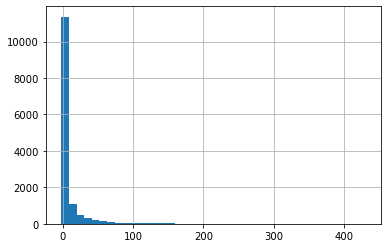

In [26]:
dispo_alimentaire['Disponibilité alimentaire en quantité (kg/personne/an)'].hist(bins=40)

On cherche à savoir quelles sont les lignes pour lesquelles le champ "Disponibilité alimentaire en quantité (kg/personne/an)" est > à 300

In [27]:
outlier_disponiblité_alimentaire_quantite_manuel = 300

In [28]:
ma_outlier_disponibilité_alimentaire_quantite_manuel = dispo_alimentaire['Disponibilité alimentaire en quantité (kg/personne/an)']>= outlier_disponiblité_alimentaire_quantite_manuel

In [29]:
dispo_alimentaire[ma_outlier_disponibilité_alimentaire_quantite_manuel]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
200,Albanie,Lait - Excl Beurre,animale,101.0,2.0,533.0,303.72,31.43,29.96,1153.0,0.0,23.0,964.0,87.0,1131.0,NaN,0.0,0.0
3321,"Chine, continentale","Légumes, Autres",vegetale,35582.0,NaN,203.0,308.07,1.76,11.47,500070.0,8084.0,304.0,426850.0,37638.0,507850.0,NaN,NaN,0.0
4792,Finlande,Lait - Excl Beurre,animale,48.0,32.0,508.0,430.76,31.73,31.86,2418.0,807.0,904.0,2337.0,NaN,2328.0,NaN,NaN,-6.0
9284,Monténégro,Lait - Excl Beurre,animale,43.0,NaN,514.0,349.21,31.29,30.26,265.0,2.0,83.0,217.0,4.0,184.0,NaN,NaN,0.0
10843,Pays-Bas,Lait - Excl Beurre,animale,599.0,NaN,460.0,341.47,27.66,28.89,6243.0,10714.0,5133.0,5723.0,0.0,12433.0,NaN,0.0,-608.0
13206,Suisse,Lait - Excl Beurre,animale,816.0,476.0,398.0,318.69,25.77,24.56,3958.0,580.0,507.0,2574.0,NaN,4032.0,NaN,91.0,0.0
13385,Suède,Lait - Excl Beurre,animale,54.0,33.0,391.0,341.23,21.22,26.93,3353.0,982.0,1425.0,3266.0,0.0,2910.0,NaN,NaN,0.0


Les valeurs des outliers ne paraissent pas abérantes donc décision de les garder

Répartition des données pour "Disponibilité de matière grasse en quantité (g/personne/jour)"

<AxesSubplot:>

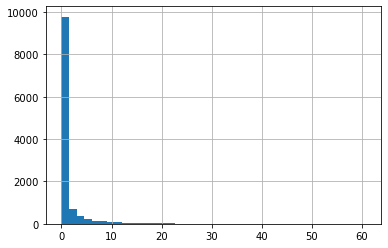

In [30]:
dispo_alimentaire['Disponibilité de matière grasse en quantité (g/personne/jour)'].hist(bins=40)

On cherche à savoir quelles sont les lignes pour lesquelles le champs "Disponibilité de matière grasse en quantité (g/personne/jour)" est > à 40

In [31]:
outlier_disponiblité_matiere_grasse_manuel = 40

In [32]:
ma_outlier_disponibilite_matiere_grasse_manuel = dispo_alimentaire['Disponibilité de matière grasse en quantité (g/personne/jour)']>= outlier_disponiblité_matiere_grasse_manuel 

In [33]:
dispo_alimentaire[ma_outlier_disponibilite_matiere_grasse_manuel]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
3083,Chine - RAS de Hong-Kong,Viande de Suides,animale,NaN,17.0,445.0,67.11,41.02,17.43,500.0,175.0,552.0,483.0,NaN,124.0,NaN,NaN,0.0
3219,"Chine, Taiwan Province de",Huile de Soja,vegetale,0.0,10.0,386.0,16.00,43.65,0.00,383.0,30.0,2.0,373.0,NaN,391.0,NaN,NaN,20.0
7255,Kazakhstan,Huile de Tournesol,vegetale,NaN,NaN,437.0,17.98,49.37,0.06,296.0,13.0,103.0,296.0,NaN,206.0,NaN,NaN,0.0
7503,Kiribati,Coco (Incl Coprah),vegetale,NaN,116.0,642.0,127.45,60.76,5.94,159.0,2.0,0.0,13.0,NaN,169.0,NaN,29.0,-9.0
7915,Libéria,Huile de Palme,vegetale,NaN,3.0,354.0,14.61,40.03,NaN,66.0,2.0,26.0,63.0,NaN,42.0,NaN,NaN,0.0
8188,Macédoine du Nord,Huile de Tournesol,vegetale,NaN,6.0,373.0,15.36,42.18,0.04,38.0,7.0,43.0,32.0,NaN,2.0,NaN,NaN,0.0
12487,Samoa,Coco (Incl Coprah),vegetale,NaN,62.0,519.0,170.12,45.26,5.22,167.0,11.0,0.0,32.0,9.0,178.0,NaN,63.0,0.0
13702,Tchéquie (la),Huile de Colza&Moutarde,vegetale,NaN,61.0,361.0,15.03,40.83,0.08,222.0,330.0,156.0,161.0,NaN,390.0,NaN,NaN,7.0
15381,États-Unis d'Amérique,Huile de Soja,vegetale,NaN,882.0,528.0,23.29,59.58,0.17,8477.0,1024.0,337.0,7454.0,141.0,9169.0,NaN,NaN,-5.0


Les valeurs des outliers ne paraissent pas abérantes donc décision de les garder

Répartition des données pour "Disponibilité de protéines en quantité (g/personne/jour)"

<AxesSubplot:>

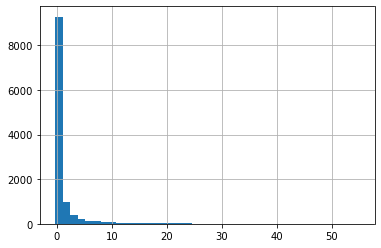

In [34]:
dispo_alimentaire['Disponibilité de protéines en quantité (g/personne/jour)'].hist(bins=40)

On cherche à savoir quelles sont les lignes pour lesquelles le champs "Disponibilité de protéines en quantité (g/personne/jour)" est > à 40

In [35]:
outlier_disponiblité_proteine_manuel = 40

In [36]:
ma_outlier_disponibilité_proteine_manuel = dispo_alimentaire['Disponibilité de protéines en quantité (g/personne/jour)']>= outlier_disponiblité_proteine_manuel

In [37]:
dispo_alimentaire[ma_outlier_disponibilité_proteine_manuel]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
259,Algérie,Blé,vegetale,545.0,820.0,1424.0,185.42,5.34,42.97,9461.0,2.0,6343.0,7270.0,672.0,3299.0,153.0,0.0,-180.0
1085,Azerbaïdjan,Blé,vegetale,591.0,264.0,1666.0,222.40,6.68,49.47,3484.0,5.0,1589.0,2093.0,71.0,1893.0,142.0,323.0,6.0
8580,Maldives,Poissons Pelagiques,animale,NaN,16.0,376.0,163.34,15.76,54.97,72.0,53.0,2.0,56.0,NaN,124.0,NaN,NaN,0.0
8796,Maroc,Blé,vegetale,2000.0,350.0,1392.0,179.70,5.52,42.56,9318.0,198.0,2762.0,5932.0,738.0,6934.0,299.0,0.0,-180.0
14108,Tunisie,Blé,vegetale,136.0,NaN,1576.0,197.50,5.72,47.59,2582.0,150.0,1489.0,2172.0,213.0,975.0,62.0,0.0,268.0
14194,Turkménistan,Blé,vegetale,802.0,NaN,1469.0,188.86,5.32,43.80,2015.0,NaN,715.0,990.0,120.0,1300.0,103.0,NaN,0.0
14256,Turquie,Blé,vegetale,211.0,1320.0,1285.0,169.96,5.09,42.29,17966.0,4366.0,4092.0,12736.0,2300.0,22100.0,1399.0,0.0,-3860.0


Les valeurs des outliers ne paraissent pas abérantes donc décision de les garder

Répartition des données pour "Disponibilité intérieure"

<AxesSubplot:>

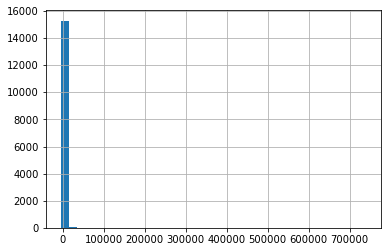

In [38]:
dispo_alimentaire['Disponibilité intérieure'].hist(bins=40)

On cherche à savoir quelles sont les lignes pour lesquelles le champs "Disponibilité intérieure " est > à 100000

In [39]:
outlier_disponiblité_interieure_manuel = 100000

In [40]:
ma_outlier_disponiblité_interieure_manuel = dispo_alimentaire['Disponibilité intérieure']>=outlier_disponiblité_interieure_manuel

In [41]:
dispo_alimentaire[ma_outlier_disponiblité_interieure_manuel]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
2163,Brésil,"Sucre, canne",vegetale,6900.0,50000.0,13.0,16.47,0.09,0.05,739267.0,0.0,NaN,3300.0,55047.0,739267.0,NaN,326711.0,NaN
3284,"Chine, continentale",Blé,vegetale,26628.0,2929.0,549.0,63.36,2.92,17.53,125247.0,563.0,5666.0,87783.0,2990.0,121926.0,4600.0,316.0,-1783.0
3321,"Chine, continentale","Légumes, Autres",vegetale,35582.0,NaN,203.0,308.07,1.76,11.47,500070.0,8084.0,304.0,426850.0,37638.0,507850.0,NaN,NaN,0.0
3324,"Chine, continentale",Maïs,vegetale,150000.0,35172.0,54.0,6.78,0.18,1.17,212998.0,251.0,3269.0,9391.0,10250.0,218489.0,1650.0,6535.0,-8509.0
3351,"Chine, continentale",Riz (Eq Blanchi),vegetale,12052.0,2072.0,805.0,78.18,2.72,14.62,133507.0,544.0,2244.0,108321.0,6393.0,135809.0,4669.0,0.0,-4002.0
3358,"Chine, continentale","Sucre, canne",vegetale,7183.0,NaN,NaN,NaN,NaN,NaN,129126.0,3.0,928.0,NaN,NaN,128201.0,NaN,121943.0,0.0
6235,Inde,Lait - Excl Beurre,animale,22757.0,0.0,129.0,84.50,5.65,8.17,133443.0,2175.0,18.0,105807.0,4878.0,135600.0,NaN,NaN,0.0
6273,Inde,"Sucre, canne",vegetale,6824.0,NaN,8.0,9.54,0.05,0.03,341200.0,0.0,0.0,11948.0,5118.0,341200.0,17060.0,300250.0,NaN
13843,Thaïlande,"Sucre, canne",vegetale,NaN,NaN,49.0,61.11,0.33,0.17,100096.0,0.0,NaN,4095.0,1001.0,100096.0,NaN,95000.0,NaN
15391,États-Unis d'Amérique,Maïs,vegetale,128024.0,50000.0,92.0,12.24,0.26,1.67,292776.0,24655.0,3595.0,3917.0,NaN,353699.0,582.0,23230.0,-39863.0


Les valeurs des outliers ne paraissent pas abérantes donc décision de les garder

Répartition des données pour "Exportations - Quantité"

<AxesSubplot:>

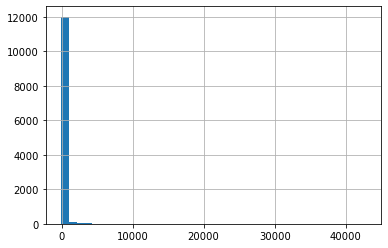

In [42]:
dispo_alimentaire['Exportations - Quantité'].hist(bins=40)

On cherche à savoir quelles sont les lignes pour lesquelles le champs "Exportations - Quantité" est > à 10000

In [43]:
outlier_exportations_manuel = 10000

In [44]:
ma_outlier_exportations_manuel = dispo_alimentaire['Exportations - Quantité']>= outlier_exportations_manuel

In [45]:
dispo_alimentaire[ma_outlier_exportations_manuel]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
352,Allemagne,Blé,vegetale,7494.0,774.0,654.0,83.41,2.59,21.17,16491.0,10870.0,5421.0,6900.0,663.0,25019.0,571.0,90.0,-3079.0
387,Allemagne,Lait - Excl Beurre,animale,2064.0,504.0,331.0,258.70,16.50,24.58,23999.0,15677.0,8332.0,21401.0,30.0,31345.0,NaN,0.0,0.0
750,Argentine,Maïs,vegetale,4923.0,1266.0,86.0,10.44,0.27,1.96,7881.0,20241.0,3.0,433.0,516.0,32119.0,280.0,464.0,-4000.0
895,Australie,Blé,vegetale,3200.0,920.0,584.0,70.46,2.47,18.45,6691.0,18171.0,283.0,1645.0,229.0,22856.0,631.0,66.0,1724.0
2130,Brésil,Maïs,vegetale,40487.0,NaN,240.0,28.01,0.98,5.31,54737.0,26780.0,979.0,5612.0,8145.0,80538.0,386.0,108.0,0.0
2139,Brésil,"Oranges, Mandarines",vegetale,NaN,NaN,13.0,16.59,0.05,0.23,5105.0,12213.0,34.0,3324.0,1781.0,17284.0,NaN,NaN,NaN
2159,Brésil,Soja,vegetale,637.0,NaN,18.0,3.62,0.18,2.33,38086.0,42797.0,283.0,725.0,NaN,81700.0,1211.0,35513.0,-1100.0
2161,Brésil,Sucre Eq Brut,vegetale,NaN,4130.0,386.0,39.61,NaN,NaN,12067.0,27728.0,10.0,7937.0,NaN,39494.0,NaN,0.0,292.0
2815,Canada,Blé,vegetale,3731.0,664.0,637.0,84.96,2.50,20.51,8381.0,20704.0,818.0,2989.0,21.0,37530.0,1031.0,0.0,-9262.0
4851,France,Blé,vegetale,7822.0,2824.0,811.0,108.43,4.20,25.99,20298.0,21502.0,2055.0,6971.0,358.0,38614.0,748.0,1575.0,1131.0


Les valeurs des outliers ne paraissent pas abérantes donc décision de les garder

Répartition des données pour "Importations - Quantité"

<AxesSubplot:>

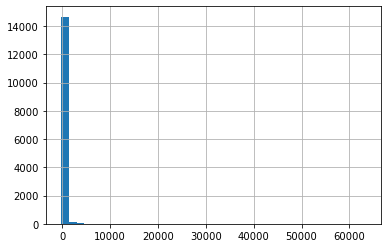

In [46]:
dispo_alimentaire['Importations - Quantité'].hist(bins=40)

On cherche à savoir quelles sont les lignes pour lesquelles le champs "Importations - Quantité" est > à 10000

In [47]:
outlier_importations_manuel = 10000

In [48]:
ma_importations_manuel = dispo_alimentaire['Importations - Quantité']>= outlier_importations_manuel

In [49]:
dispo_alimentaire[ma_importations_manuel]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
666,Arabie saoudite,Orge,vegetale,10000.0,NaN,0.0,0.01,0.00,0.00,10317.0,0.0,10547.0,0.0,317.0,11.0,0.0,NaN,-241.0
3323,"Chine, continentale",Manioc,vegetale,22868.0,7940.0,6.0,1.91,0.01,0.05,33590.0,41.0,29046.0,2645.0,138.0,4585.0,NaN,NaN,NaN
3353,"Chine, continentale",Soja,vegetale,9530.0,NaN,35.0,3.66,1.18,3.29,75081.0,250.0,63381.0,5072.0,604.0,11951.0,713.0,59162.0,0.0
7074,Japon,Maïs,vegetale,10964.0,288.0,61.0,9.21,0.20,0.16,14661.0,1.0,14403.0,1171.0,3.0,0.0,0.0,2235.0,259.0
15071,Égypte,Blé,vegetale,4860.0,0.0,1175.0,146.83,6.27,35.62,19341.0,191.0,10331.0,12048.0,2224.0,9460.0,217.0,0.0,-260.0


Les valeurs des outliers ne paraissent pas abérantes donc décision de les garder

Répartition des données pour "Nourriture"

<AxesSubplot:>

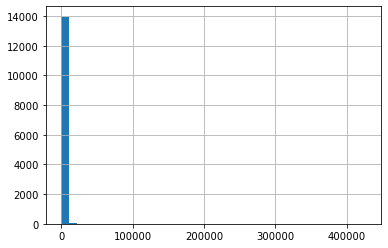

In [50]:
dispo_alimentaire['Nourriture'].hist(bins=40)

On cherche à savoir quelles sont les lignes pour lesquelles le champs "Nourriture" est > à 100000

In [51]:
outlier_nourriture_manuel = 100000

In [52]:
ma_outlier_nourriture_manuel = dispo_alimentaire['Nourriture']>= outlier_nourriture_manuel

In [53]:
dispo_alimentaire[ma_outlier_nourriture_manuel]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
3321,"Chine, continentale","Légumes, Autres",vegetale,35582.0,NaN,203.0,308.07,1.76,11.47,500070.0,8084.0,304.0,426850.0,37638.0,507850.0,NaN,NaN,0.0
3351,"Chine, continentale",Riz (Eq Blanchi),vegetale,12052.0,2072.0,805.0,78.18,2.72,14.62,133507.0,544.0,2244.0,108321.0,6393.0,135809.0,4669.0,0.0,-4002.0
6235,Inde,Lait - Excl Beurre,animale,22757.0,0.0,129.0,84.50,5.65,8.17,133443.0,2175.0,18.0,105807.0,4878.0,135600.0,NaN,NaN,0.0


Les valeurs des outliers ne paraissent pas abérantes donc décision de les garder

Répartition des données pour "Pertes"

<AxesSubplot:>

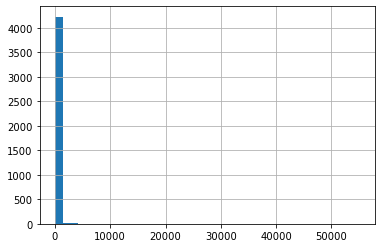

In [54]:
dispo_alimentaire['Pertes'].hist(bins=40)

On cherche à savoir quelles sont les lignes pour lesquelles le champs "Pertes" est > à 10000

In [55]:
outlier_pertes_manuel = 10000

In [56]:
ma_outlier_pertes_manuel = dispo_alimentaire['Pertes']>= outlier_pertes_manuel

In [57]:
dispo_alimentaire[ma_outlier_pertes_manuel]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
2163,Brésil,"Sucre, canne",vegetale,6900.0,50000.0,13.0,16.47,0.09,0.05,739267.0,0.0,NaN,3300.0,55047.0,739267.0,NaN,326711.0,NaN
3321,"Chine, continentale","Légumes, Autres",vegetale,35582.0,NaN,203.0,308.07,1.76,11.47,500070.0,8084.0,304.0,426850.0,37638.0,507850.0,NaN,NaN,0.0
3324,"Chine, continentale",Maïs,vegetale,150000.0,35172.0,54.0,6.78,0.18,1.17,212998.0,251.0,3269.0,9391.0,10250.0,218489.0,1650.0,6535.0,-8509.0
6263,Inde,Pommes de Terre,vegetale,NaN,14.0,45.0,24.40,0.07,1.07,45135.0,233.0,24.0,30546.0,11336.0,45344.0,3238.0,0.0,NaN


Les valeurs des outliers ne paraissent pas abérantes donc décision de les garder

Répartition des données pour "Production"

<AxesSubplot:>

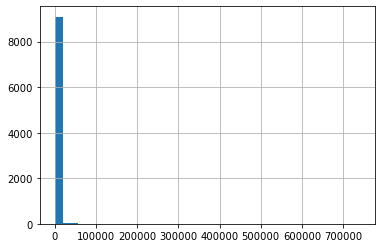

In [58]:
dispo_alimentaire['Production'].hist(bins=40)

On cherche à savoir quelles sont les lignes pour lesquelles le champs "Pertes" est > à 100000

In [59]:
outlier_production_manuel = 100000

In [60]:
ma_outlier_production_manuel = dispo_alimentaire['Production']>= outlier_production_manuel

In [61]:
dispo_alimentaire[ma_outlier_production_manuel]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
2163,Brésil,"Sucre, canne",vegetale,6900.0,50000.0,13.0,16.47,0.09,0.05,739267.0,0.0,NaN,3300.0,55047.0,739267.0,NaN,326711.0,NaN
3284,"Chine, continentale",Blé,vegetale,26628.0,2929.0,549.0,63.36,2.92,17.53,125247.0,563.0,5666.0,87783.0,2990.0,121926.0,4600.0,316.0,-1783.0
3321,"Chine, continentale","Légumes, Autres",vegetale,35582.0,NaN,203.0,308.07,1.76,11.47,500070.0,8084.0,304.0,426850.0,37638.0,507850.0,NaN,NaN,0.0
3324,"Chine, continentale",Maïs,vegetale,150000.0,35172.0,54.0,6.78,0.18,1.17,212998.0,251.0,3269.0,9391.0,10250.0,218489.0,1650.0,6535.0,-8509.0
3351,"Chine, continentale",Riz (Eq Blanchi),vegetale,12052.0,2072.0,805.0,78.18,2.72,14.62,133507.0,544.0,2244.0,108321.0,6393.0,135809.0,4669.0,0.0,-4002.0
3358,"Chine, continentale","Sucre, canne",vegetale,7183.0,NaN,NaN,NaN,NaN,NaN,129126.0,3.0,928.0,NaN,NaN,128201.0,NaN,121943.0,0.0
6235,Inde,Lait - Excl Beurre,animale,22757.0,0.0,129.0,84.50,5.65,8.17,133443.0,2175.0,18.0,105807.0,4878.0,135600.0,NaN,NaN,0.0
6266,Inde,Riz (Eq Blanchi),vegetale,2124.0,NaN,689.0,69.49,1.53,12.96,94854.0,11337.0,5.0,87006.0,3186.0,106186.0,2171.0,368.0,0.0
6273,Inde,"Sucre, canne",vegetale,6824.0,NaN,8.0,9.54,0.05,0.03,341200.0,0.0,0.0,11948.0,5118.0,341200.0,17060.0,300250.0,NaN
13843,Thaïlande,"Sucre, canne",vegetale,NaN,NaN,49.0,61.11,0.33,0.17,100096.0,0.0,NaN,4095.0,1001.0,100096.0,NaN,95000.0,NaN


Les valeurs des outliers ne paraissent pas abérantes donc décision de les garder

Répartition des données pour "Semences"

<AxesSubplot:>

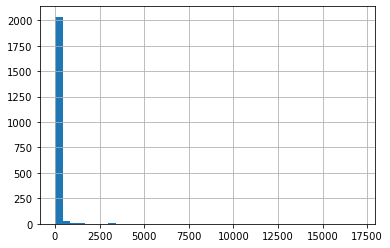

In [62]:
dispo_alimentaire['Semences'].hist(bins=40)

On cherche à savoir quelles sont les lignes pour lesquelles le champs "Semences" est > à 7500

In [63]:
outlier_semences_manuel = 7500

In [64]:
ma_outlier_semences_manuel = dispo_alimentaire['Semences']>= outlier_semences_manuel

In [65]:
dispo_alimentaire[ma_outlier_semences_manuel]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
6273,Inde,"Sucre, canne",vegetale,6824.0,NaN,8.0,9.54,0.05,0.03,341200.0,0.0,0.0,11948.0,5118.0,341200.0,17060.0,300250.0,NaN


Les valeurs des outliers ne paraissent pas abérantes donc décision de les garder

Répartition des données pour "Traitement"

<AxesSubplot:>

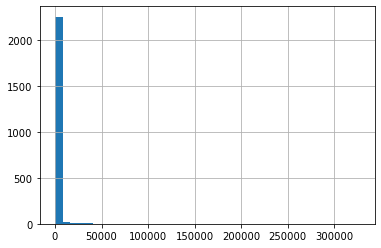

In [66]:
dispo_alimentaire['Traitement'].hist(bins=40)

On cherche à savoir quelles sont les lignes pour lesquelles le champs "Traitement" est > à 100000

In [67]:
outlier_traitement_manuel = 100000

In [68]:
ma_outlier_traitement_manuel = dispo_alimentaire['Traitement']>= outlier_traitement_manuel

In [69]:
dispo_alimentaire[ma_outlier_traitement_manuel]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
2163,Brésil,"Sucre, canne",vegetale,6900.0,50000.0,13.0,16.47,0.09,0.05,739267.0,0.0,NaN,3300.0,55047.0,739267.0,NaN,326711.0,NaN
3358,"Chine, continentale","Sucre, canne",vegetale,7183.0,NaN,NaN,NaN,NaN,NaN,129126.0,3.0,928.0,NaN,NaN,128201.0,NaN,121943.0,0.0
6273,Inde,"Sucre, canne",vegetale,6824.0,NaN,8.0,9.54,0.05,0.03,341200.0,0.0,0.0,11948.0,5118.0,341200.0,17060.0,300250.0,NaN


Les valeurs des outliers ne paraissent pas abérantes donc décision de les garder

Répartition des données pour "Variation de stock"

<AxesSubplot:>

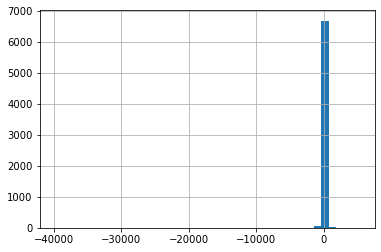

In [70]:
dispo_alimentaire['Variation de stock'].hist(bins=40)

On cherche à savoir quelles sont les lignes pour lesquelles le champs "Variation de stock" est > à - 20000

In [71]:
outlier_variation_stock_manuel = -20000

In [72]:
ma_outlier_variation_stock_manuel = dispo_alimentaire['Variation de stock']<= outlier_variation_stock_manuel

In [73]:
dispo_alimentaire[ma_outlier_variation_stock_manuel]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
15391,États-Unis d'Amérique,Maïs,vegetale,128024.0,50000.0,92.0,12.24,0.26,1.67,292776.0,24655.0,3595.0,3917.0,NaN,353699.0,582.0,23230.0,-39863.0


# Nous allons maintenant remplacer les valeurs manquantes

Vérification du nombre de valeurs manquantes dans aide_alimentaire = 0

In [74]:
aide_alimentaire.isnull().sum().sum()

0

Vérification du nombre de valeurs manquantes dans sous_nutrition = 594

In [75]:
sous_nutrition.isnull().sum().sum()

594

## Nettoyage de Chine continentale

In [76]:
clean_chine = sous_nutrition['Zone'].str.replace('Chine, continentale', 'Chine continentale')
sous_nutrition.loc[:,'Zone'] = clean_chine

On remplace toutes les valeurs manquantes de sous_nutrition

In [77]:
groups = [
    [
        [

            'Australie',
            'Autriche',
            'Azerbaïdjan',
            'Bahamas',
            'Bahreïn',
            'Bélarus',
            'Belgique',
            'Bermudes',
            'Bhoutan',
            'Bosnie-Herzégovine',
            'Brunéi Darussalam',
            'Burundi',
            'Chine - RAS de Hong-Kong',
            'Croatie',
            'Danemark',
            'Espagne',
            'Estonie',
            'Finlande',
            'Grenade',
            'Groenland',
            'Îles Cook',
            'Îles Marshall',
            'Islande',
            'Lettonie',
            'Lituanie',
            'Luxembourg',
            'Maldives',
            'Malte',
            'Micronésie (États fédérés de)',
            'Monténégro',
            'Nauru',
            'Nioué',
            'Norvège',
            'Nouvelle-Zélande',
            'Palaos',
            'Sainte-Lucie',
            'Saint-Kitts-et-Nevis',
            'Samoa',
            'Samoa américaines',
            'Seychelles',
            'Singapour',
            'Slovénie',
            'Tokélaou',
            'Tonga',
            'Tuvalu',
            'Uruguay',
            'Andorre',
            'Antigua-et-Barbuda',

        ], 
        float(0)
    ],
    
    [
        [
            'Érythrée',

        ], 
        float(1.5)

    ],

    [
        [
            'Djibouti',
            'Irlande',
            'Koweït',
        ],
        float(0.1)

    ],

    [
        [
            'Comores',
            'Cuba',
            'Grèce',
            'Hongrie',
            'Israël',
            'Portugal',
            'Qatar',
            'Suède',
            'Suisse',
            'Tchéquie',
        ],
        float(0.2)

    ],

    [
        [
            'Tunisie',
        ],
        float(0.3)
    ],

    [
        [
            'Kazakhstan',
            'Pays-Bas',
            'République démocratique populaire lao',

        ],
        float(0.4)
    ],

    [
        [
            'Guinée équatoriale',
            'Guinée-Bissau',
            'Roumanie',
    
        ],
        float(0.5)
    ],

    [
        [
            'France',
            'République de Moldova',
        ],
        float(0.6)
    ],

    [
        [
            'Canada',
            'Pologne',
        ],
        float(0.9)
    ],

    [
        [
            'Ukraine',
        ],
        float(1.1)
    ],

    [
        [
            'République de Corée',
        ],
        float(1.2)
    ],

    [
        [
            'Libye',
            'Argentine',

        ],
        float(1.3)
    ],

    [
        [
            'Italie',
            'Porto Rico',
            'Allemagne',
        ],
        float(1.4)
    ],

    [
        [
            "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",

        ],
        float(1.6)
    ],

    [
        [
            'Palestine',
        ],
        float(1.7)
    ],

    [
        [
            'Papouasie-Nouvelle-Guinée',
        ],
        float(2)
    ],

    [
        [
            'Brésil',
        ],
        float(6)
    ],

    [
        [
            'Chine continentale',
        ],
        float(151)
    ],

    [
        [
            "États-Unis d'Amérique",
        ],
        float(17)
    ],

    [
        [
            'Fédération de Russie',
        ],
        float(3)
    ],

    [
        [
            'Guinée',
        ],
        float(2.2)
    ],

    [
        [
            'Japon',
        ],
        float(3.1)
    ],

    [
        [
            'Niger',
            'Ouganda',
        ],
        float(10)
    ],

    [
        [
            'République arabe syrienne',
        ],
        float(12.4)
    ],

    [
        [
            'République centrafricaine',
        ],
        float(2.2)
    ],

    [
        [
            'République démocratique du Congo',
        ],
        float(32.2)
    ],

    [
        [
            'Somalie',
        ],
        float(9.3)
    ],

    [
        [
            'Soudan du Sud',
        ],
        float(6.5)
    ],

    [
        [
            'Tadjikistan',
        ],
        float(2.8)
    ],

    [
        [
            'Turquie',
        ],
        float(2.1)
    ],

    [
        [
            'Yémen',
        ],
        float(14)
    ],

    [
        [
            'Zambie',
        ],
        float(7.7)
    ],

    [
        [
            'Zimbabwe',
        ],
        float(7.7)
    ],

]

for group in groups:
    zones = group[0]
    fill_val = group[1]
    
    for zone in zones:
        mask_zone = sous_nutrition['Zone']== zone
        sous_nutrition.loc[mask_zone] = sous_nutrition.loc[mask_zone].fillna(fill_val) 

In [78]:
sous_nutrition.isnull().sum().sum()

0

Vérification du nombre de valeurs manquantes dans population = 0

In [79]:
population.isnull().sum().sum()

0

Vérification du nombre de valeurs manquantes dans dispo_alimentaire = 93156

In [80]:
dispo_alimentaire.isnull().sum().sum()

93156

In [81]:
dispo_alimentaire.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
mean,479.501838,87.461972,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
std,4240.119637,1154.335925,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,1113.100416,12067.344094,528.069224,10381.795904,549.834540
min,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000
max,150000.000000,50000.000000,1711.000000,430.760000,60.760000,54.970000,739267.000000,42797.000000,63381.000000,426850.000000,55047.000000,739267.000000,17060.000000,326711.000000,5284.000000


Analyse de la colonne Aliments pour animaux

<AxesSubplot:>

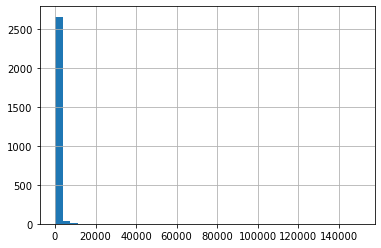

In [82]:
dispo_alimentaire['Aliments pour animaux'].hist(bins=40)

On remplace les valeurs manquantes par la médiane car la moyenne n'est pas représentative des données à cause des valeurs extrêmes

In [83]:
dispo_alimentaire['Aliments pour animaux'].replace([np.nan], dispo_alimentaire['Aliments pour animaux'].median(), inplace=True)

Analyse de la colonne Autres Utilisations

<AxesSubplot:>

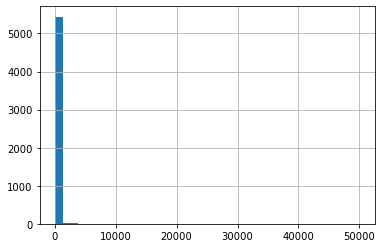

In [84]:
dispo_alimentaire['Autres Utilisations'].hist(bins=40)

On remplace les valeurs manquantes par la médiane car la moyenne n'est pas représentative des données à cause des valeurs extrêmes

In [85]:
dispo_alimentaire['Autres Utilisations'].replace([np.nan], dispo_alimentaire['Autres Utilisations'].median(), inplace=True)

Analyse de la colonne Disponibilité alimentaire (Kcal/personne/jour)

<AxesSubplot:>

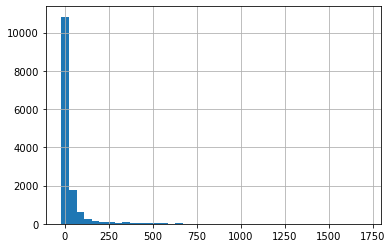

In [86]:
dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'].hist(bins=40)

On remplace les valeurs manquantes par la médiane car la moyenne n'est pas représentative des données à cause des valeurs extrêmes

In [87]:
dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'].replace([np.nan], dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'].median(), inplace=True)

Analyse de la colonne Disponibilité alimentaire en quantité (kg/personne/an)

<AxesSubplot:>

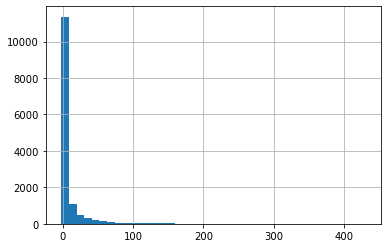

In [88]:
dispo_alimentaire['Disponibilité alimentaire en quantité (kg/personne/an)'].hist(bins=40)

On remplace les valeurs manquantes par la médiane car la moyenne n'est pas représentative des données à cause des valeurs extrêmes

In [89]:
dispo_alimentaire['Disponibilité alimentaire en quantité (kg/personne/an)'].replace([np.nan], dispo_alimentaire['Disponibilité alimentaire en quantité (kg/personne/an)'].median(), inplace=True)

Analyse de la colonne Disponibilité de matière grasse en quantité (g/personne/jour)

<AxesSubplot:>

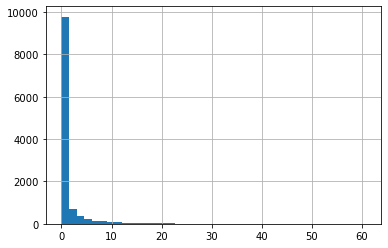

In [90]:
dispo_alimentaire['Disponibilité de matière grasse en quantité (g/personne/jour)'].hist(bins=40)

On remplace les valeurs manquantes par la médiane car la moyenne n'est pas représentative des données à cause des valeurs extrêmes

In [91]:
dispo_alimentaire['Disponibilité de matière grasse en quantité (g/personne/jour)'].replace([np.nan], dispo_alimentaire['Disponibilité de matière grasse en quantité (g/personne/jour)'].median(), inplace=True)

Analyse de la colonne Disponibilité de protéines en quantité (g/personne/jour)

<AxesSubplot:>

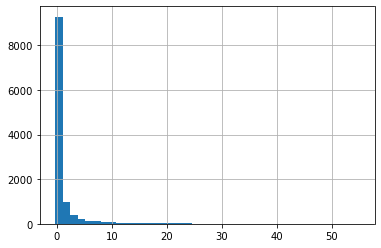

In [92]:
dispo_alimentaire['Disponibilité de protéines en quantité (g/personne/jour)'].hist(bins=40)

On remplace les valeurs manquantes par la médiane car la moyenne n'est pas représentative des données à cause des valeurs extrêmes

In [93]:
dispo_alimentaire['Disponibilité de protéines en quantité (g/personne/jour)'].replace([np.nan], dispo_alimentaire['Disponibilité de protéines en quantité (g/personne/jour)'].median(), inplace=True)

Analyse de la colonne Disponibilité intérieure

<AxesSubplot:>

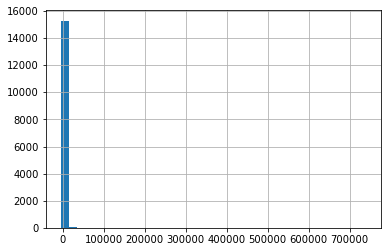

In [94]:
dispo_alimentaire['Disponibilité intérieure'].hist(bins=40)

On remplace les valeurs manquantes par la médiane car la moyenne n'est pas représentative des données à cause des valeurs extrêmes

In [95]:
dispo_alimentaire['Disponibilité intérieure'].replace([np.nan], dispo_alimentaire['Disponibilité intérieure'].median(), inplace=True)

Analyse de la colonne Exportations - Quantité

<AxesSubplot:>

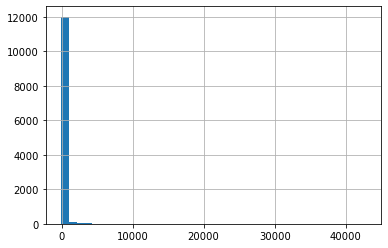

In [96]:
dispo_alimentaire['Exportations - Quantité'].hist(bins=40)

On remplace les valeurs manquantes par la médiane car la moyenne n'est pas représentative des données à cause des valeurs extrêmes

In [97]:
dispo_alimentaire['Exportations - Quantité'].replace([np.nan], dispo_alimentaire['Exportations - Quantité'].median(), inplace=True)

Analyse de la colonne Importations - Quantité

<AxesSubplot:>

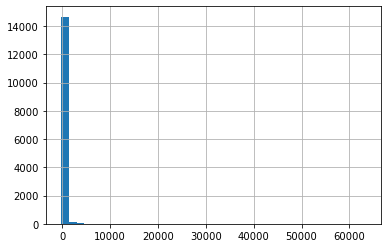

In [98]:
dispo_alimentaire['Importations - Quantité'].hist(bins=40)

On remplace les valeurs manquantes par la médiane car la moyenne n'est pas représentative des données à cause des valeurs extrêmes

In [99]:
dispo_alimentaire['Importations - Quantité'].replace([np.nan], dispo_alimentaire['Importations - Quantité'].median(), inplace=True)

Analyse de la colonne Nourriture

<AxesSubplot:>

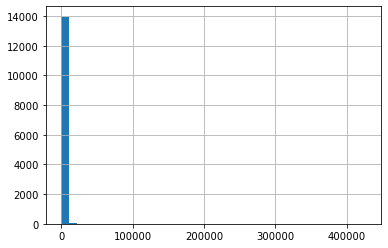

In [100]:
dispo_alimentaire['Nourriture'].hist(bins=40)

On remplace les valeurs manquantes par la médiane car la moyenne n'est pas représentative des données à cause des valeurs extrêmes

In [101]:
dispo_alimentaire['Nourriture'].replace([np.nan], dispo_alimentaire['Nourriture'].median(), inplace=True)

Analyse de la colonne Pertes

<AxesSubplot:>

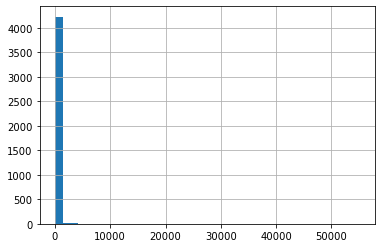

In [102]:
dispo_alimentaire['Pertes'].hist(bins=40)

On remplace les valeurs manquantes par la médiane car la moyenne n'est pas représentative des données à cause des valeurs extrêmes

In [103]:
dispo_alimentaire['Pertes'].replace([np.nan], dispo_alimentaire['Pertes'].median(), inplace=True)

Analyse de la colonne Production

<AxesSubplot:>

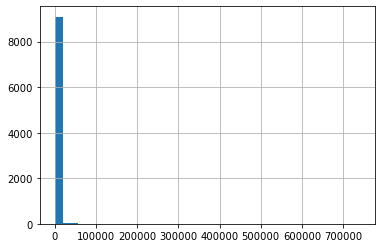

In [104]:
dispo_alimentaire['Production'].hist(bins=40)

On remplace les valeurs manquantes par la médiane car la moyenne n'est pas représentative des données à cause des valeurs extrêmes

In [105]:
dispo_alimentaire['Production'].replace([np.nan], dispo_alimentaire['Production'].median(), inplace=True)

Analyse de la colonne Semences

<AxesSubplot:>

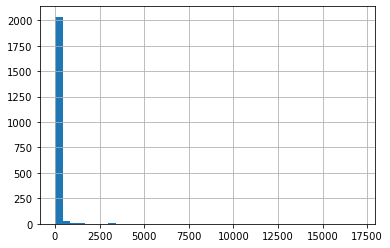

In [106]:
dispo_alimentaire['Semences'].hist(bins=40)

On remplace les valeurs manquantes par la médiane car la moyenne n'est pas représentative des données à cause des valeurs extrêmes

In [107]:
dispo_alimentaire['Semences'].replace([np.nan], dispo_alimentaire['Semences'].median(), inplace=True)

Analyse de la colonne Traitement

<AxesSubplot:>

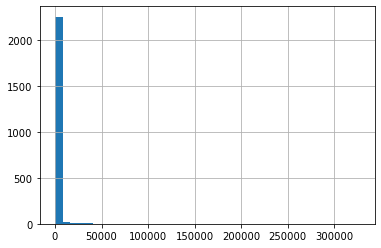

In [108]:
dispo_alimentaire['Traitement'].hist(bins=40)

On remplace les valeurs manquantes par la médiane car la moyenne n'est pas représentative des données à cause des valeurs extrêmes

In [109]:
dispo_alimentaire['Traitement'].replace([np.nan], dispo_alimentaire['Traitement'].median(), inplace=True)

Analyse de la colonne Variation de stock

<AxesSubplot:>

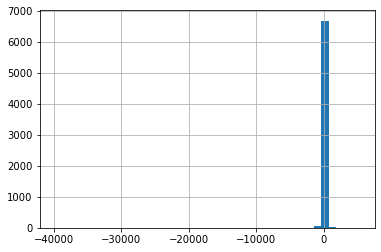

In [110]:
dispo_alimentaire['Variation de stock'].hist(bins=40)

On remplace les valeurs manquantes par la médiane car la moyenne n'est pas représentative des données à cause des valeurs extrêmes

In [111]:
dispo_alimentaire['Variation de stock'].replace([np.nan], dispo_alimentaire['Variation de stock'].median(), inplace=True)

In [112]:
dispo_alimentaire.isnull().sum().sum()

0

On va unifier le type de donnée int pour le champ "Année" dans tous les DT. On modifie donc le type de donnée pour "Année" dans sous_nutrition

In [113]:
def cpt(dt):
    l = dt.split('-')
    l_int = [int(d) for d in l]
    avg = int(sum(l_int)/len(l_int))
    return avg


sous_nutrition['Année'] = sous_nutrition['Année'].apply(cpt)

In [114]:
print(sous_nutrition.dtypes)

Zone      object
Année      int64
Valeur    object
dtype: object


Dans sous_nutrition on va remplace toutes les valeurs "<0.1" en 0 pour avoir un type float

In [115]:
clean_valeur_sous_nutrition = sous_nutrition['Valeur'].replace('<0.1', 0)
sous_nutrition.loc[:,'Valeur'] = clean_valeur_sous_nutrition

Mettre toutes les valeurs de sous_nutrition dans un type float afin de pouvoir faire des calculs par la suite 

In [116]:
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].astype(np.float64)

# Proprotion de personnes en état de sous nutrition en 2017

In [117]:
population

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
...,...,...,...
1411,Zimbabwe,2014,13586.707
1412,Zimbabwe,2015,13814.629
1413,Zimbabwe,2016,14030.331
1414,Zimbabwe,2017,14236.595


Il faut convertir le champ "Valeur" en million car qui est exprimé en millier

In [118]:
population['Valeur'] = population['Valeur']*1000

In [119]:
population

,Zone,Année,Valeur
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0
...,...,...,...
1411,Zimbabwe,2014,13586707.0
1412,Zimbabwe,2015,13814629.0
1413,Zimbabwe,2016,14030331.0
1414,Zimbabwe,2017,14236595.0


In [120]:
sous_nutrition

,Zone,Année,Valeur
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5
...,...,...,...
1213,Zimbabwe,2014,7.7
1214,Zimbabwe,2015,7.7
1215,Zimbabwe,2016,7.7
1216,Zimbabwe,2017,7.7


Il faut convertir le champ "Valeur" en million car qui est exprimé en dixaine de million

In [121]:
sous_nutrition['Valeur'] = sous_nutrition['Valeur']*1000000

In [122]:
sous_nutrition

,Zone,Année,Valeur
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0
...,...,...,...
1213,Zimbabwe,2014,7700000.0
1214,Zimbabwe,2015,7700000.0
1215,Zimbabwe,2016,7700000.0
1216,Zimbabwe,2017,7700000.0


In [123]:
ma_2017_sous_nutrition = sous_nutrition['Année'] == 2017

In [124]:
sous_nutrition[ma_2017_sous_nutrition]

,Zone,Année,Valeur
4,Afghanistan,2017,10500000.0
10,Afrique du Sud,2017,3100000.0
16,Albanie,2017,100000.0
22,Algérie,2017,1300000.0
28,Allemagne,2017,1400000.0
...,...,...,...
1192,Venezuela (République bolivarienne du),2017,8000000.0
1198,Viet Nam,2017,6500000.0
1204,Yémen,2017,14000000.0
1210,Zambie,2017,7700000.0


In [125]:
sous_nutrition[ma_2017_sous_nutrition]['Valeur'].sum()

856700000.0

In [126]:
ma_2017_population = population['Année'] == 2017

In [127]:
population[ma_2017_population]

,Zone,Année,Valeur
4,Afghanistan,2017,36296113.0
10,Afrique du Sud,2017,57009756.0
16,Albanie,2017,2884169.0
22,Algérie,2017,41389189.0
28,Allemagne,2017,82658409.0
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402484.0
1396,Viet Nam,2017,94600648.0
1402,Yémen,2017,27834819.0
1408,Zambie,2017,16853599.0


In [128]:
population[ma_2017_population]['Valeur'].sum()

7548134111.0

Calcul de la proportion de personnes en état de sous nutrition en 2017

In [129]:
(sous_nutrition[ma_2017_sous_nutrition]['Valeur'].sum()/population[ma_2017_population]['Valeur'].sum())*100

11.349824836200503

# Le nombre théorique de personnes qui pourraient être nourries

In [130]:
dispo_alimentaire

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,4.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,2.0,53.0,4.0,53.0,2.0,6.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,4.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,2.0,6.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,4.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,4.0,22.0,2.0,6.0,0.0
3,Afghanistan,Ananas,vegetale,4.0,0.0,0.0,0.00,0.08,0.10,0.0,0.0,0.0,0.0,4.0,22.0,2.0,6.0,0.0
4,Afghanistan,Bananes,vegetale,4.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,4.0,22.0,2.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,4.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,4.0,2.0,2.0,6.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,4.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,4.0,0.0,2.0,6.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,4.0,0.0,0.0,0.06,0.08,0.04,0.0,0.0,0.0,0.0,4.0,22.0,2.0,6.0,0.0
15603,Îles Salomon,Vin,vegetale,4.0,0.0,0.0,0.07,0.08,0.10,0.0,0.0,0.0,0.0,4.0,22.0,2.0,6.0,0.0


On supprime les colonnes inutiles dans le DF dispo_alimentaire pour calculer notre mesure

In [135]:
dispo_alimentaire_clear = dispo_alimentaire.drop(columns=[
    "Aliments pour animaux", 
    "Origine",
    "Autres Utilisations", 
    "Disponibilité alimentaire en quantité (kg/personne/an)",
    "Disponibilité de matière grasse en quantité (g/personne/jour)",
    "Disponibilité de protéines en quantité (g/personne/jour)",
    "Disponibilité intérieure", "Exportations - Quantité", 
    "Importations - Quantité", 
    "Nourriture", 
    "Pertes",
    "Production",
    "Semences",
    "Traitement",
    "Variation de stock"])
dispo_alimentaire_clear

,Zone,Produit,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,Abats Comestible,5.0
1,Afghanistan,"Agrumes, Autres",1.0
2,Afghanistan,Aliments pour enfants,1.0
3,Afghanistan,Ananas,0.0
4,Afghanistan,Bananes,4.0
...,...,...,...
15600,Îles Salomon,Viande de Suides,45.0
15601,Îles Salomon,Viande de Volailles,11.0
15602,Îles Salomon,"Viande, Autre",0.0
15603,Îles Salomon,Vin,0.0


On agrège les disponibilité alimentaire par pays 

In [136]:
dispo_pays = pd.pivot_table(data=dispo_alimentaire_clear,index=['Zone'],aggfunc="sum")
dispo_pays

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,2107.0
Afrique du Sud,3052.0
Albanie,3240.0
Algérie,3329.0
Allemagne,3547.0
...,...
Émirats arabes unis,3347.0
Équateur,2382.0
États-Unis d'Amérique,3714.0


On récupère les données de 2017 dans le DF population

In [137]:
population_2017 = population[ma_2017_population]
population_2017

,Zone,Année,Valeur
4,Afghanistan,2017,36296113.0
10,Afrique du Sud,2017,57009756.0
16,Albanie,2017,2884169.0
22,Algérie,2017,41389189.0
28,Allemagne,2017,82658409.0
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402484.0
1396,Viet Nam,2017,94600648.0
1402,Yémen,2017,27834819.0
1408,Zambie,2017,16853599.0


On jointe les DF population et dispo_pays

In [138]:
dispo_alimentaire_2017 = pd.merge(population_2017,dispo_pays, how='inner', on=['Zone', 'Zone'])
dispo_alimentaire_2017 = dispo_alimentaire_2017.rename(columns={"Valeur" : "Population"})
dispo_alimentaire_2017

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296113.0,2107.0
1,Afrique du Sud,2017,57009756.0,3052.0
2,Albanie,2017,2884169.0,3240.0
3,Algérie,2017,41389189.0,3329.0
4,Allemagne,2017,82658409.0,3547.0
...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402484.0,2665.0
168,Viet Nam,2017,94600648.0,2776.0
169,Yémen,2017,27834819.0,2249.0
170,Zambie,2017,16853599.0,1944.0


On calcule les dispo alimentaire totales par pays et par jour

In [139]:
dispo_kcal_pays = round((dispo_alimentaire_2017['Population'] * dispo_alimentaire_2017['Disponibilité alimentaire (Kcal/personne/jour)']), 1)
dispo_alimentaire_2017['dispo_kcal_pays'] = dispo_kcal_pays
dispo_alimentaire_2017

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_pays
0,Afghanistan,2017,36296113.0,2107.0,7.647591e+10
1,Afrique du Sud,2017,57009756.0,3052.0,1.739938e+11
2,Albanie,2017,2884169.0,3240.0,9.344708e+09
3,Algérie,2017,41389189.0,3329.0,1.377846e+11
4,Allemagne,2017,82658409.0,3547.0,2.931894e+11
...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402484.0,2665.0,7.835762e+10
168,Viet Nam,2017,94600648.0,2776.0,2.626114e+11
169,Yémen,2017,27834819.0,2249.0,6.260051e+10
170,Zambie,2017,16853599.0,1944.0,3.276340e+10


On calcule le nombre de personnes qui pourraient être nourries sur une base de 2500kcal/jour

In [141]:
pop_totale = dispo_alimentaire_2017["Population"].sum()
kcal_total = dispo_alimentaire_2017["dispo_kcal_pays"].sum()
kcal_mini = 2500
pers_nourrie = round((kcal_total/kcal_mini))
pers_nourrie

8462395801

On transforme le résultat obtenu ci-dessus en %

In [143]:
proportion_personne_nourrie = round((pers_nourrie / pop_totale) * 100,1)
proportion_personne_nourrie

116.1

# Le nombre théorique de personnes qui pourraient être nourries avec des produits végétaux

In [144]:
ma_pdt_vegetaux = dispo_alimentaire['Origine']=='vegetale'

In [147]:
dispo_alim_pdt_vegetaux = dispo_alimentaire[ma_pdt_vegetaux]
dispo_alim_pdt_vegetaux

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
1,Afghanistan,"Agrumes, Autres",vegetale,4.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,2.0,6.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,4.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,4.0,22.0,2.0,6.0,0.0
3,Afghanistan,Ananas,vegetale,4.0,0.0,0.0,0.00,0.08,0.10,0.0,0.0,0.0,0.0,4.0,22.0,2.0,6.0,0.0
4,Afghanistan,Bananes,vegetale,4.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,4.0,22.0,2.0,6.0,0.0
6,Afghanistan,Bière,vegetale,4.0,0.0,0.0,0.09,0.08,0.00,3.0,0.0,3.0,3.0,4.0,22.0,2.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15595,Îles Salomon,Sésame,vegetale,4.0,0.0,0.0,0.01,0.08,0.10,0.0,0.0,0.0,0.0,4.0,22.0,2.0,6.0,0.0
15596,Îles Salomon,Thé,vegetale,4.0,0.0,0.0,0.17,0.08,0.04,0.0,0.0,0.0,0.0,4.0,22.0,2.0,6.0,0.0
15597,Îles Salomon,Tomates,vegetale,4.0,0.0,0.0,0.07,0.08,0.10,0.0,0.0,0.0,0.0,4.0,22.0,2.0,6.0,0.0
15603,Îles Salomon,Vin,vegetale,4.0,0.0,0.0,0.07,0.08,0.10,0.0,0.0,0.0,0.0,4.0,22.0,2.0,6.0,0.0


On supprime les colonnes inutiles dans le DF dispo_alimentaire pour calculer notre mesure

In [148]:
dispo_alimentaire_clear2 = dispo_alim_pdt_vegetaux.drop(columns=[
    "Aliments pour animaux", 
    "Origine",
    "Autres Utilisations", 
    "Disponibilité alimentaire en quantité (kg/personne/an)",
    "Disponibilité de matière grasse en quantité (g/personne/jour)",
    "Disponibilité de protéines en quantité (g/personne/jour)",
    "Disponibilité intérieure", "Exportations - Quantité", 
    "Importations - Quantité", 
    "Nourriture", 
    "Pertes",
    "Production",
    "Semences",
    "Traitement",
    "Variation de stock"])
dispo_alimentaire_clear2

,Zone,Produit,Disponibilité alimentaire (Kcal/personne/jour)
1,Afghanistan,"Agrumes, Autres",1.0
2,Afghanistan,Aliments pour enfants,1.0
3,Afghanistan,Ananas,0.0
4,Afghanistan,Bananes,4.0
6,Afghanistan,Bière,0.0
...,...,...,...
15595,Îles Salomon,Sésame,0.0
15596,Îles Salomon,Thé,0.0
15597,Îles Salomon,Tomates,0.0
15603,Îles Salomon,Vin,0.0


On agrège les disponibilité alimentaire par pays 

In [150]:
dispo_vegetaux_pays = pd.pivot_table(data=dispo_alimentaire_clear2,index=['Zone'],aggfunc="sum")
dispo_vegetaux_pays

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,1891.0
Afrique du Sud,2565.0
Albanie,2255.0
Algérie,2951.0
Allemagne,2505.0
...,...
Émirats arabes unis,2786.0
Équateur,1768.0
États-Unis d'Amérique,2730.0


On jointe les DF population et dispo_vegetaux_pays

In [151]:
dispo_alimentaire_vegetaux_2017 = pd.merge(population_2017,dispo_vegetaux_pays, how='inner', on=['Zone', 'Zone'])
dispo_alimentaire_vegetaux_2017 = dispo_alimentaire_vegetaux_2017.rename(columns={"Valeur" : "Population"})
dispo_alimentaire_vegetaux_2017

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296113.0,1891.0
1,Afrique du Sud,2017,57009756.0,2565.0
2,Albanie,2017,2884169.0,2255.0
3,Algérie,2017,41389189.0,2951.0
4,Allemagne,2017,82658409.0,2505.0
...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402484.0,2189.0
168,Viet Nam,2017,94600648.0,2201.0
169,Yémen,2017,27834819.0,2060.0
170,Zambie,2017,16853599.0,1838.0


On calcule les dispo alimentaire totales de produits végétaux par pays et par jour

In [152]:
dispo_kcal_vegetaux_pays = round((dispo_alimentaire_vegetaux_2017['Population'] * dispo_alimentaire_vegetaux_2017['Disponibilité alimentaire (Kcal/personne/jour)']), 1)
dispo_alimentaire_vegetaux_2017['dispo_kcal_vegetaux_pays'] = dispo_kcal_vegetaux_pays
dispo_alimentaire_vegetaux_2017

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_vegetaux_pays
0,Afghanistan,2017,36296113.0,1891.0,6.863595e+10
1,Afrique du Sud,2017,57009756.0,2565.0,1.462300e+11
2,Albanie,2017,2884169.0,2255.0,6.503801e+09
3,Algérie,2017,41389189.0,2951.0,1.221395e+11
4,Allemagne,2017,82658409.0,2505.0,2.070593e+11
...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402484.0,2189.0,6.436204e+10
168,Viet Nam,2017,94600648.0,2201.0,2.082160e+11
169,Yémen,2017,27834819.0,2060.0,5.733973e+10
170,Zambie,2017,16853599.0,1838.0,3.097691e+10


On calcule le nombre de personnes qui pourraient être nourries avec des produits végétaux sur une base de 2500kcal/jour

In [153]:
pop_totale = dispo_alimentaire_vegetaux_2017["Population"].sum()
kcal_vegetaux_total = dispo_alimentaire_vegetaux_2017["dispo_kcal_vegetaux_pays"].sum()
kcal_mini = 2500
pers_nourrie_vegetaux = round((kcal_vegetaux_total/kcal_mini))
pers_nourrie_vegetaux

6998952063

On transforme le résultat obtenu ci-dessus en %

In [154]:
proportion_personne_nourrie_vegetaux = round((pers_nourrie_vegetaux / pop_totale) * 100,1)
proportion_personne_nourrie_vegetaux

96.0

# Utilisation de la disponibilité intérieure

La disponibilité intérieure est égale à la somme : Nourriture + Semences + Pertes + Aliments pour animaux + Traitement + Autres utilisations

In [164]:
disponibilite_interieure = dispo_alimentaire['Nourriture'].sum() + dispo_alimentaire['Semences'].sum() + dispo_alimentaire['Semences'].sum() + dispo_alimentaire['Pertes'].sum() + dispo_alimentaire['Aliments pour animaux'].sum() + dispo_alimentaire['Autres Utilisations'].sum()
disponibilite_interieure

7583108.0

Part de la disponibilité intérieure attribuée à l'alimentation des animaux

In [167]:
dispo_alimentaire['Aliments pour animaux'].sum()/disponibilite_interieure*100

17.87901477863694

Part de la disponibilité intérieure attribuée aux pertes

In [168]:
dispo_alimentaire['Pertes'].sum()/disponibilite_interieure*100

6.5804944357907065

Part de la disponibilité intérieure attribuée à l'alimentation humaine

In [169]:
dispo_alimentaire['Nourriture'].sum()/disponibilite_interieure*100

64.409052330522

In [170]:
dispo_alimentaire['Nourriture'].sum()

4884208.0

# Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [177]:
sous_nutrition_2017 = sous_nutrition['Année']==2017
personnes_sous_nutrition_2017 = sous_nutrition[sous_nutrition_2017]

In [175]:
population_2017

,Zone,Année,Valeur
4,Afghanistan,2017,36296113.0
10,Afrique du Sud,2017,57009756.0
16,Albanie,2017,2884169.0
22,Algérie,2017,41389189.0
28,Allemagne,2017,82658409.0
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402484.0
1396,Viet Nam,2017,94600648.0
1402,Yémen,2017,27834819.0
1408,Zambie,2017,16853599.0


In [178]:
proportion_sous_nutrition = pd.merge(population_2017,personnes_sous_nutrition_2017, how='inner', on=['Zone', 'Zone'])
proportion_sous_nutrition

,Zone,Année_x,Valeur_x,Année_y,Valeur_y
0,Afghanistan,2017,36296113.0,2017,10500000.0
1,Afrique du Sud,2017,57009756.0,2017,3100000.0
2,Albanie,2017,2884169.0,2017,100000.0
3,Algérie,2017,41389189.0,2017,1300000.0
4,Allemagne,2017,82658409.0,2017,1400000.0
...,...,...,...,...,...
197,Venezuela (République bolivarienne du),2017,29402484.0,2017,8000000.0
198,Viet Nam,2017,94600648.0,2017,6500000.0
199,Yémen,2017,27834819.0,2017,14000000.0
200,Zambie,2017,16853599.0,2017,7700000.0


In [180]:
proportion = proportion_sous_nutrition['Valeur_y'] / proportion_sous_nutrition['Valeur_x']*100
proportion_sous_nutrition['proportion'] = proportion
proportion_sous_nutrition

,Zone,Année_x,Valeur_x,Année_y,Valeur_y,proportion
0,Afghanistan,2017,36296113.0,2017,10500000.0,28.928718
1,Afrique du Sud,2017,57009756.0,2017,3100000.0,5.437666
2,Albanie,2017,2884169.0,2017,100000.0,3.467203
3,Algérie,2017,41389189.0,2017,1300000.0,3.140917
4,Allemagne,2017,82658409.0,2017,1400000.0,1.693718
...,...,...,...,...,...,...
197,Venezuela (République bolivarienne du),2017,29402484.0,2017,8000000.0,27.208586
198,Viet Nam,2017,94600648.0,2017,6500000.0,6.870989
199,Yémen,2017,27834819.0,2017,14000000.0,50.296716
200,Zambie,2017,16853599.0,2017,7700000.0,45.687571


In [183]:
top_10_pays_sous_nutrition = proportion_sous_nutrition.sort_values(by=['proportion'], ascending = False)

In [184]:
top_10_pays_sous_nutrition.head(10)

,Zone,Année_x,Valeur_x,Année_y,Valeur_y,proportion
149,République arabe syrienne,2017,17095678.0,2017,12400000.0,72.532952
174,Somalie,2017,14589179.0,2017,9300000.0,63.745876
176,Soudan du Sud,2017,10910763.0,2017,6500000.0,59.574202
201,Zimbabwe,2017,14236595.0,2017,7700000.0,54.085966
199,Yémen,2017,27834819.0,2017,14000000.0,50.296716
77,Haïti,2017,10982366.0,2017,5300000.0,48.259182
150,République centrafricaine,2017,4596023.0,2017,2200000.0,47.867472
156,République populaire démocratique de Corée,2017,25429825.0,2017,12000000.0,47.188685
126,Niger,2017,21602382.0,2017,10000000.0,46.291191
200,Zambie,2017,16853599.0,2017,7700000.0,45.687571


# Pays qui ont le plus bénéficié d’aide depuis 2013

In [185]:
aide_alimentaire

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [186]:
total_aide_alimentaire = pd.pivot_table(data=aide_alimentaire,index=['Pays bénéficiaire'],aggfunc="sum")
total_aide_alimentaire

,Année,Valeur
Pays bénéficiaire,,
Afghanistan,32216,185452
Algérie,78561,81114
Angola,8054,5014
Bangladesh,50347,348188
Bhoutan,24170,2666
...,...,...
Zambie,8054,3026
Zimbabwe,38263,62570
Égypte,4026,1122


In [187]:
top_10_pays_aide_alimentaire = total_aide_alimentaire.sort_values(by=['Valeur'], ascending = False)
top_10_pays_aide_alimentaire.head(10)

,Année,Valeur
Pays bénéficiaire,,
République arabe syrienne,76543,1858943
Éthiopie,66460,1381294
Yémen,76553,1206484
Soudan du Sud,44309,695248
Soudan,48335,669784
Kenya,54376,552836
Bangladesh,50347,348188
Somalie,54377,292678
République démocratique du Congo,50350,288502


# Pays ayant le moins de disponibilité alimentaire par habitant 

On reprend le DF dispo_alimentaire_clear que nous avons utilisé plus haut

In [188]:
dispo_alimentaire_clear

,Zone,Produit,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,Abats Comestible,5.0
1,Afghanistan,"Agrumes, Autres",1.0
2,Afghanistan,Aliments pour enfants,1.0
3,Afghanistan,Ananas,0.0
4,Afghanistan,Bananes,4.0
...,...,...,...
15600,Îles Salomon,Viande de Suides,45.0
15601,Îles Salomon,Viande de Volailles,11.0
15602,Îles Salomon,"Viande, Autre",0.0
15603,Îles Salomon,Vin,0.0


On vient agréger les disponibilité alimentaire par pays : ce qu'on a fait plus haut avec dispo_pays

In [189]:
dispo_pays

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,2107.0
Afrique du Sud,3052.0
Albanie,3240.0
Algérie,3329.0
Allemagne,3547.0
...,...
Émirats arabes unis,3347.0
Équateur,2382.0
États-Unis d'Amérique,3714.0


On trie dispo_pays par ordre croissant

In [191]:
top_10_moins_dispo_alim = dispo_pays.sort_values(by=['Disponibilité alimentaire (Kcal/personne/jour)'])

On ressort les 10 pays qui ont le moins de disponibilité alimentaire par habitant

In [192]:
top_10_moins_dispo_alim.head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,1899.0
Zambie,1944.0
Madagascar,2076.0
République populaire démocratique de Corée,2101.0
Afghanistan,2107.0
Haïti,2109.0
Zimbabwe,2129.0
Timor-Leste,2137.0
Tchad,2137.0


# Pays ayant le plus de disponibilité alimentaire par habitant 

On trie dispo_pays par ordre décroissant

In [193]:
top_10_plus_dispo_alim = dispo_pays.sort_values(by=['Disponibilité alimentaire (Kcal/personne/jour)'], ascending=False)

On ressort les 10 pays qui ont le plus de disponibilité alimentaire par habitant

In [194]:
top_10_plus_dispo_alim.head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,3806.0
Belgique,3785.0
Turquie,3752.0
États-Unis d'Amérique,3714.0
Irlande,3650.0
Israël,3630.0
Italie,3618.0
Luxembourg,3608.0
Allemagne,3547.0
